In [17]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
df = pd.read_csv('for_viz.csv')
df

,school_and_program,estimated_total_cost,semester_to_complete
0,CJS MS Data,165981,3
1,CBS MSAFA Program,143659,3
2,Law School LL.M,119997,2
3,CJS General MS,119659,2
4,CBS MS in Marketing Science,117954,3
5,CBS MSFE Program,113862,4
6,CCS MS in Sustainability Science,100701,2
7,CSE MS,100120,2
8,SPS MS,98157,2


In [58]:
%%R
install.packages("ggpattern")





The downloaded binary packages are in
	/var/folders/nf/hzs770c17vb39slzt00kvk040000gn/T//RtmpT0L0Qx/downloaded_packages


trying URL 'https://lib.stat.cmu.edu/R/CRAN/bin/macosx/big-sur-x86_64/contrib/4.4/ggpattern_1.1.4.tgz'
Content type 'application/x-gzip' length 2602980 bytes (2.5 MB)
downloaded 2.5 MB



In [59]:
%%R 

df <- read.csv("for_viz.csv")

In [60]:
%%R 

head(df)

           school_and_program estimated_total_cost semester_to_complete
                CJS MS Data                165981                    3
           CBS MSAFA Program               143659                    3
             Law School LL.M               119997                    2
              CJS General MS               119659                    2
 CBS MS in Marketing Science               117954                    3
            CBS MSFE Program               113862                    4


In [61]:
df = df.sort_values(by='estimated_total_cost', ascending=False)
df

,school_and_program,estimated_total_cost,semester_to_complete
0,CJS MS Data,165981,3
1,CBS MSAFA Program,143659,3
2,Law School LL.M,119997,2
3,CJS General MS,119659,2
4,CBS MS in Marketing Science,117954,3
5,CBS MSFE Program,113862,4
6,CCS MS in Sustainability Science,100701,2
7,CSE MS,100120,2
8,SPS MS,98157,2


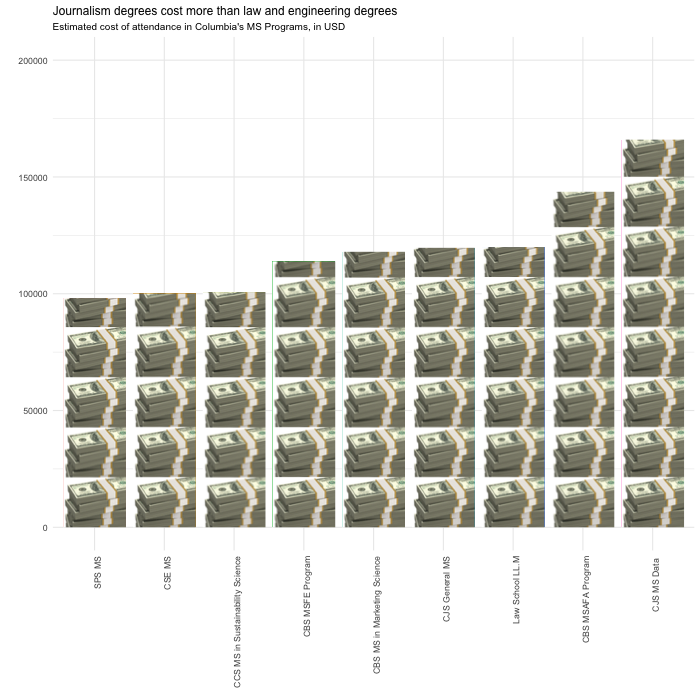

In [86]:
%%R -w 700 -h 700

# Reorder the factor levels based on 'estimated_total_cost'
df$school_and_program <- factor(df$school_and_program, 
                                 levels = df$school_and_program[order(df$estimated_total_cost)])

# Now plot the data
ggplot(df, aes(x = school_and_program, y = estimated_total_cost, fill = school_and_program)) +
  geom_bar_pattern(
    stat = "identity",
    pattern = "image",
    pattern_filename = "dollars.png",  # Replace with the actual image file path
    pattern_type = "tile",  # Ensures the image repeats
    pattern_scale = 0.1
  ) +
  theme_minimal() +
  labs(
      title = "Journalism degrees cost more than law and engineering degrees",
      subtitle = "Estimated cost of attendance in Columbia's MS Programs, in USD",
      x = " ",
      y = " ") +
  theme(
    legend.position = "none",
    plot.title = element_text(size = 12),
    plot.subtitle = element_text(size = 10),
    axis.text.x = element_text(angle = 90, hjust = 1),  # Rotate x-axis labels to 90 degrees
    axis.title.x = element_text(size = 5)  # Adjust size of x-axis titl
  ) + 
    ylim(0, 200000) 


In [87]:
%%R
ggsave("plot.png", width = 6, height = 6)